## Finding Insights From CSV

#### Importing Libraries

In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
pd.set_option('display.max_rows', 1000,'display.max_columns', None)

#### Importing CSV

In [3]:
userDetailsDF = pd.read_csv("Input_csv/user_purchase_data.csv")
trackSubscriptionDF = pd.read_csv("Input_csv/track_subscription_data.csv")
quizAttemptDF = pd.read_csv("Input_csv/user_quiz_attempt_data.csv")
watchedVideoDF = pd.read_csv("Input_csv/user_video_activity_data.csv")
interactedStudyCardsDF = pd.read_csv("Input_csv/user_studycard_data.csv")

In [4]:
userDetailsDF.head()

,user_uid,date_joined,date_of_first_purhcase
0,6,2021-06-04,2021-06-04
1,608,2021-06-04,NaN
2,635,2021-06-04,NaN
3,745,2021-06-04,NaN
4,1506,2021-06-04,NaN


In [5]:
trackSubscriptionDF.head()

,user_id,track_slug,subscription_date
0,6,kerala-psc,2021-06-04
1,6,KTET,2021-06-04
2,608,spoken-english,2021-06-04
3,608,APPSC,2021-06-04
4,608,Eng_With_Awal,2021-06-04


In [32]:
quizAttemptDF.head()

,user_id,attempt_id,started_at,status,no_of_questions,question_attempted,watched_at_date,watched_at_time
0,1506,50839743,None,CREATE,10,0,NaT,NaT
1,1506,50839752,None,PAUSE,10,10,NaT,NaT
2,1642,50842794,2021-06-04 16:52:25.634573+00:00,COMPLETE,10,10,2021-06-04,16:52:25.634573
3,1642,50843057,2021-06-04 16:55:37.917805+00:00,COMPLETE,10,10,2021-06-04,16:55:37.917805
4,1642,50843164,None,CREATE,10,0,NaT,NaT


In [43]:
watchedVideoDF.head()

,user_id,watch_instance_id,watched_at,video_id,duration,watched_duration,watched_at_date,watched_at_time
130,1512,24004401,2021-06-04 16:18:38.939932+00:00,19183,465,0,2021-06-04,16:18:38.939932
132,1642,24011267,2021-06-04 18:32:46.898409+00:00,31592,369,0,2021-06-04,18:32:46.898409
127,635,23996470,2021-06-04 14:15:26.632537+00:00,22246,813,678,2021-06-04,14:15:26.632537
134,1796,24007227,2021-06-04 17:09:01.912895+00:00,8160,1357,16,2021-06-04,17:09:01.912895
3,6,24011800,2021-06-04 18:51:27.450857+00:00,24531,319,28,2021-06-04,18:51:27.450857


In [8]:
interactedStudyCardsDF.head()

,user_id,activity_id,start_time
0,1642,4197126,2021-06-04 16:51:51.454473+00:00
1,1642,4197075,2021-06-04 16:43:10.115201+00:00
2,1642,4197074,2021-06-04 16:43:10.082261+00:00
3,1642,4197577,2021-06-04 18:20:58.487196+00:00
4,1642,4197174,2021-06-04 16:57:46.487970+00:00


#### Row Column Count

In [9]:
print("userDetailsDF = ",userDetailsDF.shape)
print("trackSubscriptionDF = ",trackSubscriptionDF.shape)
print("quizAttemptDF = ",quizAttemptDF.shape)
print("watchedVideoDF = ",watchedVideoDF.shape)
print("interactedStudyCardsDF = ",interactedStudyCardsDF.shape)

userDetailsDF =  (1000, 3)
trackSubscriptionDF =  (1578, 3)
quizAttemptDF =  (21419, 6)
watchedVideoDF =  (12907, 6)
interactedStudyCardsDF =  (3480, 3)


#### Cleaning the dataset

In [10]:
# Removing duplicate rows
userDetailsDF.drop_duplicates(subset=None, keep= "first",inplace=True)
trackSubscriptionDF.drop_duplicates(subset=None, keep= "first",inplace=True)
quizAttemptDF.drop_duplicates(subset=None, keep= "first",inplace=True)
watchedVideoDF.drop_duplicates(subset=None, keep= "first",inplace=True)
interactedStudyCardsDF.drop_duplicates(subset=None, keep= "first",inplace=True)

In [11]:
# Removing rows with None 
userDetailsDF.dropna(axis=0,how='all',inplace=True)
trackSubscriptionDF.dropna(axis=0,how='all',inplace=True)
quizAttemptDF.dropna(axis=0,how='all',inplace=True)
watchedVideoDF.dropna(axis=0,how='all',inplace=True)
interactedStudyCardsDF.dropna(axis=0,how='all',inplace=True)

In [12]:
#splitting datetime format to seperate column of watchedVideoDF & quizAttemptDF
watchedVideoDF['watched_at_date'] = pd.to_datetime(watchedVideoDF['watched_at'], errors='coerce').dt.date
watchedVideoDF['watched_at_time'] = pd.to_datetime(watchedVideoDF['watched_at'], errors='coerce').dt.time
quizAttemptDF['watched_at_date'] = pd.to_datetime(quizAttemptDF['started_at'], errors='coerce').dt.date
quizAttemptDF['watched_at_time'] = pd.to_datetime(quizAttemptDF['started_at'], errors='coerce').dt.time

In [44]:
#droping rows where date_of_first_purhcase is earlier than date_joined
# userDetailsPaidDF = userDetailsDF[userDetailsDF['date_of_first_purhcase'].notna()]
# userDetailsPaidDF.reset_index(inplace = True, drop = True)

# for ind in userDetailsPaidDF.index:
#     if str(userDetailsPaidDF.iloc[ind,1]) <= str(userDetailsPaidDF.iloc[ind,2]):
#         userDetailsPaidDF.iloc[ind] = None
#     else:
#         userDetailsPaidDF.iloc[ind] = userDetailsPaidDF.iloc[ind]

C:\Users\Arjun\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### Paid v/s Unpaid


In [14]:
userDetailsPaidDF = userDetailsDF[userDetailsDF['date_of_first_purhcase'].notna()]
userDetailsUnpaidDF = userDetailsDF[userDetailsDF['date_of_first_purhcase'].isna()]

In [15]:
userDetailsPaidDF.head()

,user_uid,date_joined,date_of_first_purhcase
0,6,2021-06-04,2021-06-04
6,1642,2021-06-04,2021-06-04
8,1831,2021-06-04,2021-06-16
9,2610,2021-06-05,2021-06-05
10,3418,2021-06-05,2021-07-07


In [16]:
userDetailsUnpaidDF.head()

,user_uid,date_joined,date_of_first_purhcase
1,608,2021-06-04,NaN
2,635,2021-06-04,NaN
3,745,2021-06-04,NaN
4,1506,2021-06-04,NaN
5,1512,2021-06-04,NaN


In [17]:
#All values are not of datetime datatype, convert all the datas in date to datetime data type
userDetailsDF['date_of_first_purhcase']= pd.to_datetime(userDetailsDF['date_of_first_purhcase'])
userDetailsDF['date_joined']= pd.to_datetime(userDetailsDF['date_joined'])

(array([737949., 737956., 737963., 737972., 737979., 737986., 737993.,
        738003.]),
 <a list of 8 Text major ticklabel objects>)

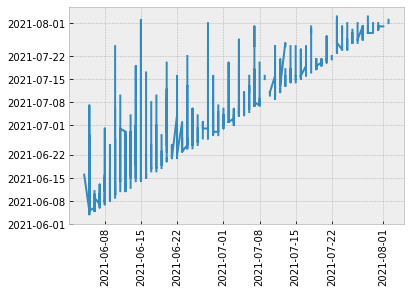

In [29]:
plt.plot(userDetailsDF['date_joined'], userDetailsDF['date_of_first_purhcase'])
plt.xticks(rotation='vertical')

In [24]:
userDetailsPaidList = userDetailsPaidDF['user_uid'].to_list()

In [25]:
userDetailsUnpaidList = userDetailsUnpaidDF['user_uid'].to_list()

In [22]:
trackSubscriptionDF.head()

,user_id,track_slug,subscription_date
0,6,kerala-psc,2021-06-04
1,6,KTET,2021-06-04
2,608,spoken-english,2021-06-04
3,608,APPSC,2021-06-04
4,608,Eng_With_Awal,2021-06-04


In [23]:
watchedVideoDF.head()

,user_id,watch_instance_id,watched_at,video_id,duration,watched_duration,watched_at_date,watched_at_time
0,6,24552452,2021-06-12 18:13:40.347392+00:00,25261,934,2,2021-06-12,18:13:40.347392
1,6,24552735,2021-06-12 18:21:45.362998+00:00,25262,398,398,2021-06-12,18:21:45.362998
2,6,24011079,2021-06-04 18:27:01.296468+00:00,24920,1589,55,2021-06-04,18:27:01.296468
3,6,24011800,2021-06-04 18:51:27.450857+00:00,24531,319,28,2021-06-04,18:51:27.450857
4,6,24249571,2021-06-08 11:19:02.187747+00:00,32825,317,15,2021-06-08,11:19:02.187747


In [37]:
watchedVideoDF = watchedVideoDF.sort_values(by="watched_at_date")